<a href="https://colab.research.google.com/github/mattekudacy/fcc-machine-learning-with-python/blob/main/Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gym
import numpy as np
import time

In [ ]:
env = gym.make('FrozenLake-v0')

In [ ]:
print(env.observation_space.n) #get number of states
print(env.action_space.n) #get number of actions

16
4


In [ ]:
env.reset()

0

In [ ]:
action = env.action_space.sample() # get random action
print(action)

3


In [ ]:
new_state, reward, done, info = env.step(action)

In [ ]:
env.render()

  (Up)
SFFF
FHFH
FFFH
HFFG


In [ ]:
env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [ ]:
Q = np.zeros((STATES, ACTIONS)) #create matrix

In [ ]:
# constants
EPISODES = 2000 # how many times to run the environment
MAX_STEPS = 100 # max number of steps allowed for each run of environment

LEARNING_RATE = 0.81 

RENDER = False

GAMMA = 0.96

In [ ]:
epsilon = 0.9 #start with a 90% chance of picking a random action

# code to pick action
# if np.random.uniform(0,1) < epsilon: # if numbers are less than epslion
#   action = env.action_space.sample() #take random action
# else:
#   action = np.argmax(Q[state, :]) #use q table to pick best action based on 

In [ ]:
# Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) -Q[state, action])

In [ ]:
env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

# constants
EPISODES = 2000 # how many times to run the environment
MAX_STEPS = 100 # max number of steps allowed for each run of environment

LEARNING_RATE = 0.81 

RENDER = False

GAMMA = 0.96

epsilon = 0.9

rewards = []

for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):

    if RENDER:
      env.render()
    
    if np.random.uniform(0,1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :])
    
    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) - Q[state, action])

    state = next_state

    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break #reached goal
print(Q)
print(f"Average Reward: {sum(rewards)/len(rewards)}:")

[[0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.00560146 0.029241   0.99975378]
 [0.         0.         0.         0.        ]]
Average Reward: 0.0075:


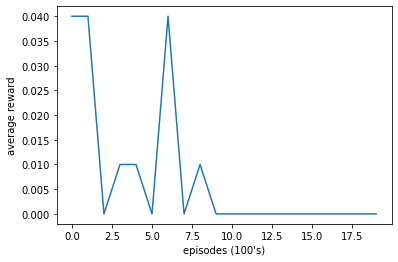

In [ ]:
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()